In [1]:
import os
os.chdir("../../analyses_data/sensitivity_tests/Spectronaut_LargeFC/")

In [2]:
RESULTS_NO_COUNTING = "results"
RESULTS_W_COUNTING_MIN2_EITHER = "results_w_counting"
RESULTS_W_COUNTING_MIN2_EITHER_V2 = "results_w_counting_v2"
CONDPAIR = ("S1", "S2")

ALHAQUANT_RESULTS_NO_COUNTING = f"{RESULTS_NO_COUNTING}/{CONDPAIR[0]}_VS_{CONDPAIR[1]}.results.tsv"
ALHAQUANT_RESULTS_W_COUNTING_MIN2_EITHER = f"{RESULTS_W_COUNTING_MIN2_EITHER}/{CONDPAIR[0]}_VS_{CONDPAIR[1]}.results.tsv"
ALHAQUANT_RESULTS_W_COUNTING_MIN2_EITHER_V2 = f"{RESULTS_W_COUNTING_MIN2_EITHER_V2}/{CONDPAIR[0]}_VS_{CONDPAIR[1]}.results.tsv"

In [3]:
import pandas as pd

df_alphaquant_no_counting = pd.read_csv(ALHAQUANT_RESULTS_NO_COUNTING, sep='\t')[["protein", "log2fc", "fdr", "quality_score","total_intensity", "PG.Organisms"]]
df_alphaquant_no_counting = df_alphaquant_no_counting.rename(columns={ "PG.Organisms": "organism", "total_intensity" : "intensity"})
df_alphaquant_no_counting = df_alphaquant_no_counting.dropna(subset=["organism"])
df_alphaquant_no_counting = df_alphaquant_no_counting[[";" not in x for x in df_alphaquant_no_counting["organism"]]]


df_alphaquant_w_counting = pd.read_csv(ALHAQUANT_RESULTS_W_COUNTING_MIN2_EITHER, sep='\t')[["protein", "log2fc", "fdr", "quality_score", "PG.Organisms", "total_intensity"]]
df_alphaquant_w_counting = df_alphaquant_w_counting.rename(columns={"PG.Organisms": "organism", "total_intensity" : "intensity"})
df_alphaquant_w_counting = df_alphaquant_w_counting.dropna(subset=["organism"])
df_alphaquant_w_counting = df_alphaquant_w_counting[[";" not in x for x in df_alphaquant_w_counting["organism"]]]

df_alphaquant_w_counting_v2 = pd.read_csv(ALHAQUANT_RESULTS_W_COUNTING_MIN2_EITHER_V2, sep='\t')[["protein", "log2fc", "fdr", "quality_score", "PG.Organisms", "total_intensity"]]
df_alphaquant_w_counting_v2 = df_alphaquant_w_counting_v2.rename(columns={"PG.Organisms": "organism_w_counting_v2", "total_intensity" : "intensity_w_counting_v2", "log2fc": "log2fc_w_counting_v2", "fdr": "fdr_w_counting_v2", "quality_score": "quality_score_w_counting_v2"})
df_alphaquant_w_counting_v2 = df_alphaquant_w_counting_v2.dropna(subset=["organism_w_counting_v2"])
df_alphaquant_w_counting_v2 = df_alphaquant_w_counting_v2[[";" not in x for x in df_alphaquant_w_counting_v2["organism_w_counting_v2"]]]


display(df_alphaquant_no_counting)
display(df_alphaquant_w_counting)

merged_df = pd.merge(df_alphaquant_no_counting, df_alphaquant_w_counting, on="protein", how="outer", suffixes=("_no_counting", "_w_counting"))
merged_df = pd.merge(merged_df, df_alphaquant_w_counting_v2, on="protein", how="outer")



display(merged_df)

,protein,log2fc,fdr,quality_score,intensity,organism
0,P49327,0.007360,9.800684e-01,0.999755,1.149622e+08,Homo sapiens
1,Q9BW27,0.024652,9.908412e-01,0.995112,3.362037e+06,Homo sapiens
2,P55072,0.010217,9.996854e-01,0.999620,4.770176e+07,Homo sapiens
3,O75534,0.001291,9.996854e-01,0.998302,1.190745e+07,Homo sapiens
4,P29218,-0.053876,9.996854e-01,0.999838,1.796103e+06,Homo sapiens
...,...,...,...,...,...,...
8590,Q5VW38;Q5VW38-2;Q5VW38-3,0.124389,8.371661e-01,0.957970,1.238670e+04,Homo sapiens
8591,Q5BJF6;Q5BJF6-10;Q5BJF6-2;Q5BJF6-3;Q5BJF6-4;Q5...,-0.434426,4.672396e-01,0.993920,1.734930e+04,Homo sapiens
8592,O75843,0.287880,9.996854e-01,0.847038,8.225507e+04,Homo sapiens
8593,G5EDZ7,-1.466162,5.099107e-10,0.923442,4.552864e+04,Caenorhabditis elegans


,protein,log2fc,fdr,quality_score,organism,intensity
0,Q8N9T8,-0.086811,0.999995,NaN,Homo sapiens,2.676429e+06
1,Q92878;Q92878-2,0.012524,0.999995,NaN,Homo sapiens,1.325286e+07
2,Q9UL46,0.063618,0.999995,NaN,Homo sapiens,6.374981e+06
3,Q16643,-0.004762,0.999995,NaN,Homo sapiens,6.685991e+06
4,P39060;P39060-1;P39060-2,0.257674,0.921363,NaN,Homo sapiens,1.711065e+04
...,...,...,...,...,...,...
10592,Q9H160;Q9H160-2,0.813651,0.510327,NaN,Homo sapiens,1.250220e+02
10593,P47017,3.743738,0.306295,NaN,Saccharomyces cerevisiae (strain ATCC 204508 /...,6.251098e+01
10594,H2L0B6;Q21956,-3.805649,0.343936,NaN,Caenorhabditis elegans,1.406497e+02
10595,P0AFW8,-4.049438,0.343936,NaN,Escherichia coli (strain K12),1.406497e+02


,protein,log2fc_no_counting,fdr_no_counting,quality_score_no_counting,intensity_no_counting,organism_no_counting,log2fc_w_counting,fdr_w_counting,quality_score_w_counting,organism_w_counting,intensity_w_counting,log2fc_w_counting_v2,fdr_w_counting_v2,quality_score_w_counting_v2,organism_w_counting_v2,intensity_w_counting_v2
0,P49327,0.007360,0.980068,0.999755,1.149622e+08,Homo sapiens,0.004849,0.908158,NaN,Homo sapiens,1.154936e+08,0.004849,0.907081,NaN,Homo sapiens,1.154936e+08
1,Q9BW27,0.024652,0.990841,0.995112,3.362037e+06,Homo sapiens,-0.017275,0.999995,NaN,Homo sapiens,3.378303e+06,-0.017275,0.999995,NaN,Homo sapiens,3.378303e+06
2,P55072,0.010217,0.999685,0.999620,4.770176e+07,Homo sapiens,-0.008202,0.999995,NaN,Homo sapiens,4.789661e+07,-0.008202,0.999995,NaN,Homo sapiens,4.789661e+07
3,O75534,0.001291,0.999685,0.998302,1.190745e+07,Homo sapiens,0.011520,0.999995,NaN,Homo sapiens,1.197125e+07,0.011520,0.999995,NaN,Homo sapiens,1.197125e+07
4,P29218,-0.053876,0.999685,0.999838,1.796103e+06,Homo sapiens,0.011962,0.904419,NaN,Homo sapiens,1.913498e+06,0.011962,0.903124,NaN,Homo sapiens,1.913498e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10592,Q9H160;Q9H160-2,NaN,NaN,NaN,NaN,NaN,0.813651,0.510327,NaN,Homo sapiens,1.250220e+02,9.210335,0.002366,NaN,Homo sapiens,1.250193e+02
10593,P47017,NaN,NaN,NaN,NaN,NaN,3.743738,0.306295,NaN,Saccharomyces cerevisiae (strain ATCC 204508 /...,6.251098e+01,12.174112,0.001360,NaN,Saccharomyces cerevisiae (strain ATCC 204508 /...,6.250967e+01
10594,H2L0B6;Q21956,NaN,NaN,NaN,NaN,NaN,-3.805649,0.343936,NaN,Caenorhabditis elegans,1.406497e+02,-11.822585,0.004002,NaN,Caenorhabditis elegans,1.406468e+02
10595,P0AFW8,NaN,NaN,NaN,NaN,NaN,-4.049438,0.343936,NaN,Escherichia coli (strain K12),1.406497e+02,-11.774379,0.007666,NaN,Escherichia coli (strain K12),1.406468e+02


,organism,hits_w_counting_v2,max_hits_w_counting_v2,allowed_decoy_hits_w_counting_v2,hits_no_counting,max_hits_no_counting,allowed_decoy_hits_no_counting
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Caenorhabditis elegans,1946.0,2072.0,NaN,1221.0,1327.0,NaN
2,Escherichia coli (strain K12),1002.0,1044.0,NaN,455.0,492.0,NaN
3,Homo sapiens,100.0,0.0,217.0,77.0,0.0,115.0
4,Saccharomyces cerevisiae (strain ATCC 204508 /...,1085.0,1155.0,NaN,434.0,483.0,NaN


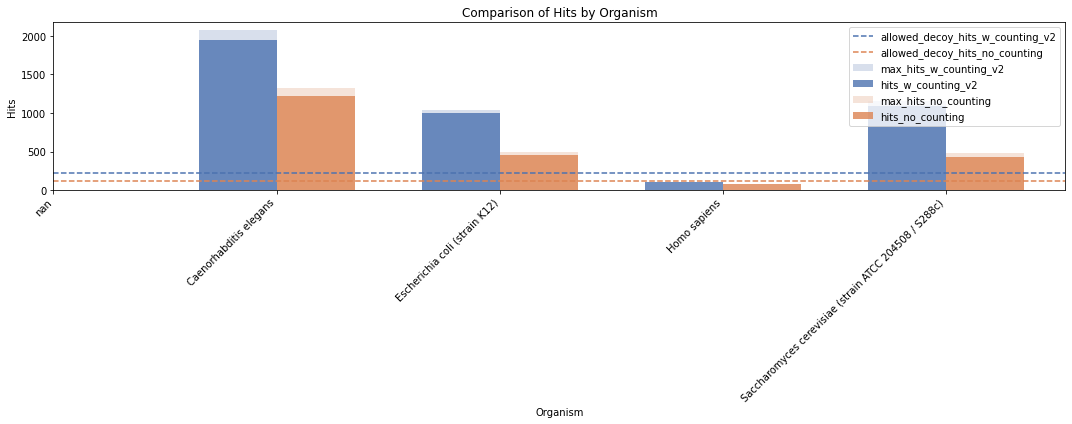

None


In [4]:
import alphaquant.benchm.sensitivity as aq_benchm_sensititivy
classification_benchmark = aq_benchm_sensititivy.RatioClassificationTableGenerator(merged_df, method_suffixes=[ "_w_counting_v2","_no_counting"] ,decoy_organism="Homo sapiens")
classification_df = classification_benchmark.per_species_results_df
display(classification_df)
ax = aq_benchm_sensititivy.plot_sighits_barplot(classification_benchmark.per_species_results_df, [ "_w_counting_v2","_no_counting"], 'Homo sapiens')

print(ax)
#

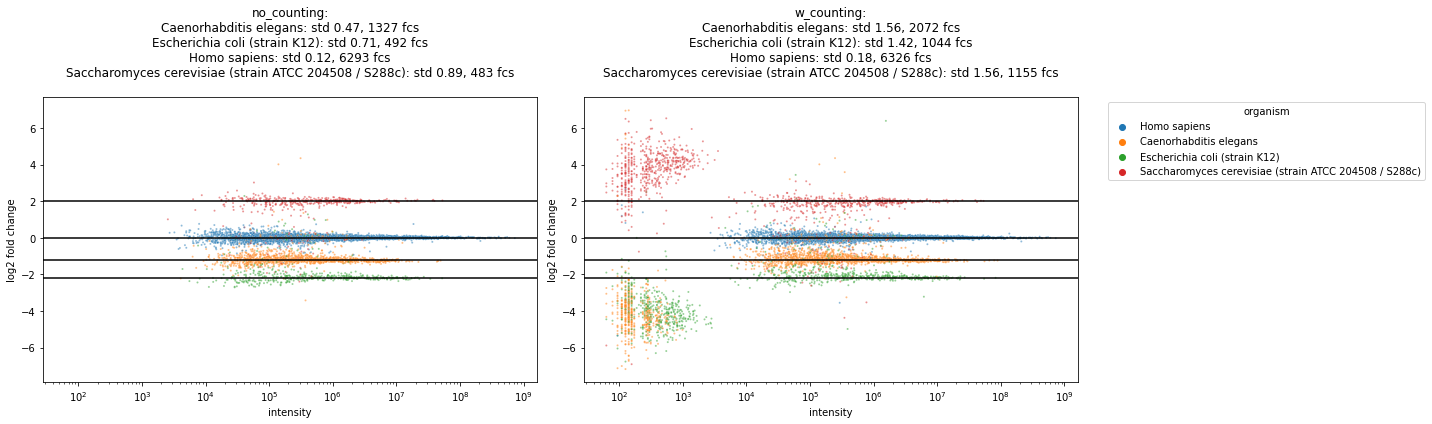

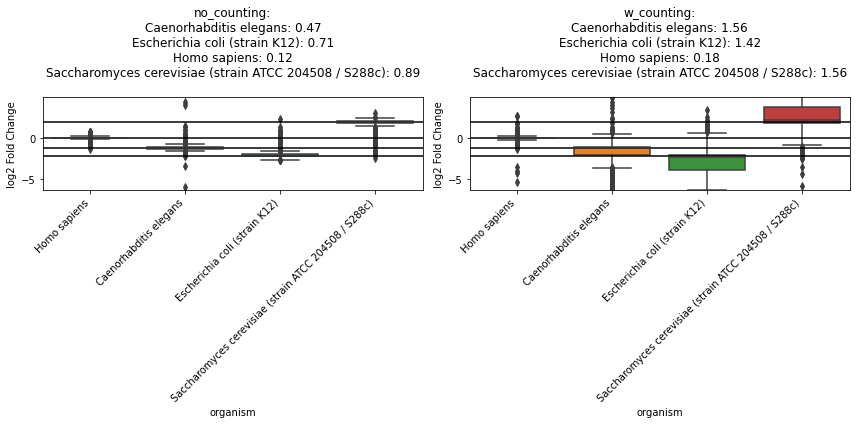

In [5]:
import alphaquant.benchm.ratios as aq_benchm_ratios
scatter_plotter = aq_benchm_ratios.MixedSpeciesScatterPlotter(df_combined=merged_df, method_suffixes=["_no_counting", "_w_counting" ], expected_log2fcs=[-2.2, -1.2,0,  2], figure_size=[10, 6])
aq_benchm_ratios.MixedSpeciesBoxPlotter(df_combined=merged_df, method_suffixes=["_no_counting", "_w_counting" ], expected_log2fcs=[-2.2, -1.2,0,  2], figure_size=[6, 6])


